In [42]:
library(ggplot2)
library(tidyverse)
options(repr.plot.height=4,repr.plot.width=6, repr.plot.res = 400)

Cargar los datos en un dataframe llamado: airbnb

In [43]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [44]:
airbnb
#head(airbnb)

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95
28004,Universidad,House,Private room,7,5,1,7,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Fire extinguisher,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,77
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [45]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb)=c(newnames)

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [46]:
airbnb$MetrosCuadrados=airbnb$PiesCuadrados*0.092903
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [47]:
airbnbModificado=airbnb
airbnbModificado[which(airbnbModificado$CodigoPostal== ""),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal== "-"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal == "28"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal=="20013"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal=="20126"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal=="25008"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal=="27004"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal=="27013"),"CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal=="2015"), "CodigoPostal"] <- NA
airbnbModificado[which(airbnbModificado$CodigoPostal == "28002\n28002"),"CodigoPostal"] <- "28002"
airbnbModificado[which(airbnbModificado$CodigoPostal == "2804"),"CodigoPostal"] <- "28004"
airbnbModificado[which(airbnbModificado$CodigoPostal == "2805"),"CodigoPostal"] <- "28005"
airbnbModificado[which(airbnbModificado$CodigoPostal == "2815"),"CodigoPostal"] <- "28015"
airbnbModificado[which(airbnbModificado$CodigoPostal == "28051\n28051"),"CodigoPostal"] <- "28051"
airbnbModificado[which(airbnbModificado$CodigoPostal == "280013"),"CodigoPostal"] <- "28013"
airbnbModificado[which(airbnbModificado$CodigoPostal == "Madrid 28004"),"CodigoPostal"] <- "28004"

In [48]:
airbnbModificado$CodigoPostal=droplevels(airbnbModificado$CodigoPostal)


Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [49]:
levels(airbnbModificado$CodigoPostal)

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [52]:
# ?sort
#sort(x, decreasing = FALSE, ...)

In [53]:
print("5 códigos postales con MÁS entradas:")
head(sort(table(airbnbModificado$CodigoPostal),decreasing=TRUE))

print("5 códigos postales con MENOS entradas:")
tail(sort(table(airbnbModificado$CodigoPostal),decreasing=TRUE))

#En realidad hay más códigos con solo 1 entrada pero bueno, creo que responde a la consigna igual

[1] "5 códigos postales con MÁS entradas:"



28012 28004 28005 28013 28014 28015 
 2060  1796  1195  1020   630   601 

[1] "5 códigos postales con MENOS entradas:"



28056 28058 28060 28094 28105 28850 
    1     1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [55]:
# ?which

In [56]:
unique(airbnbModificado$Barrio[which(airbnbModificado$CodigoPostal=="28012")])

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [57]:
airbnb28012=airbnbModificado[which(airbnbModificado$CodigoPostal == "28012"),]
airbnb28012$Barrio=factor(airbnb28012$Barrio)
table(airbnb28012$Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [58]:
paste("Total de barrios: ", length(unique(airbnbModificado$Barrio)))
levels(airbnb $Barrio)

[1] "Total de barrios:  125"

[1] "Abrantes"                       "Acacias"                       
  [3] "Adelfas"                        "Aeropuerto"                    
  [5] "Aguilas"                        "Alameda de Osuna"              
  [7] "Almagro"                        "Almenara"                      
  [9] "Almendrales"                    "Aluche"                        
 [11] "Ambroz"                         "Amposta"                       
 [13] "Apostol Santiago"               "Arapiles"                      
 [15] "Aravaca"                        "Arcos"                         
 [17] "ArgÃ¼elles"                     "Atocha"                        
 [19] "Bellas Vistas"                  "Berruguete"                    
 [21] "Buenavista"                     "Butarque"                      
 [23] "CÃ¡rmenes"                      "Campamento"                    
 [25] "Canillas"                       "Canillejas"                    
 [27] "Casa de Campo"                  "Casco HistÃ³rico de Barajas"   
 [29] "Casco HistÃ³rico de Vallecas"   "Casco HistÃ³rico de VicÃ¡lvaro"
 [31] "Castellana"                     "Castilla"                      
 [33] "Castillejos"                    "Chopera"                       
 [35] "Ciudad JardÃ­n"                 "Ciudad Universitaria"          
 [37] "Colina"                         "Comillas"                      
 [39] "ConcepciÃ³n"                    "Corralejos"                    
 [41] "Cortes"                         "Costillares"                   
 [43] "Cuatro Caminos"                 "Cuatro Vientos"                
 [45] "Delicias"                       "El Goloso"                     
 [47] "El PlantÃ­o"                    "El Viso"                       
 [49] "Embajadores"                    "EntrevÃ­as"                    
 [51] "Estrella"                       "FontarrÃ³n"                    
 [53] "Fuente del Berro"               "Fuentelareina"                 
 [55] "Gaztambide"                     "Goya"                          
 [57] "Guindalera"                     "HellÃ­n"                       
 [59] "HispanoamÃ©rica"                "Ibiza"                         
 [61] "Imperial"                       "JerÃ³nimos"                    
 [63] "Justicia"                       "La Paz"                        
 [65] "Legazpi"                        "Lista"                         
 [67] "Los Angeles"                    "Los Rosales"                   
 [69] "Lucero"                         "Marroquina"                    
 [71] "Media Legua"                    "Mirasierra"                    
 [73] "MoscardÃ³"                      "NiÃ±o JesÃºs"                  
 [75] "Nueva EspaÃ±a"                  "Numancia"                      
 [77] "OpaÃ±el"                        "Orcasitas"                     
 [79] "Orcasur"                        "PacÃ­fico"                     
 [81] "Palacio"                        "Palomas"                       
 [83] "Palomeras Bajas"                "Palomeras Sureste"             
 [85] "Palos de Moguer"                "Pavones"                       
 [87] "PeÃ±agrande"                    "Pilar"                         
 [89] "Pinar del Rey"                  "Piovera"                       
 [91] "Portazgo"                       "Pradolongo"                    
 [93] "Prosperidad"                    "Pueblo Nuevo"                  
 [95] "Puerta Bonita"                  "Puerta del Angel"              
 [97] "Quintana"                       "Recoletos"                     
 [99] "Rejas"                          "Rios Rosas"                    
[101] "Rosas"                          "Salvador"                      
[103] "San AndrÃ©s"                    "San Cristobal"                 
[105] "San Diego"                      "San FermÃ­n"                   
[107] "San Isidro"                     "San Juan Bautista"             
[109] "San Pascual"                    "Santa Eugenia"                 
[111] "Simancas"                       "So

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [59]:
head(sort(table(airbnbModificado$Barrio),decreasing=TRUE))


Embajadores Universidad     Palacio         Sol    Justicia      Cortes 
       1844        1358        1083         940         785         750 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [60]:
paste("Hay ",length(unique(airbnbModificado$TipoAlquiler)), "tipos de alquiler: ")
unique(airbnbModificado$TipoAlquiler)
table(airbnbModificado$TipoAlquiler)

[1] "Hay  3 tipos de alquiler: "

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 9 rows containing non-finite values (stat_summary)."

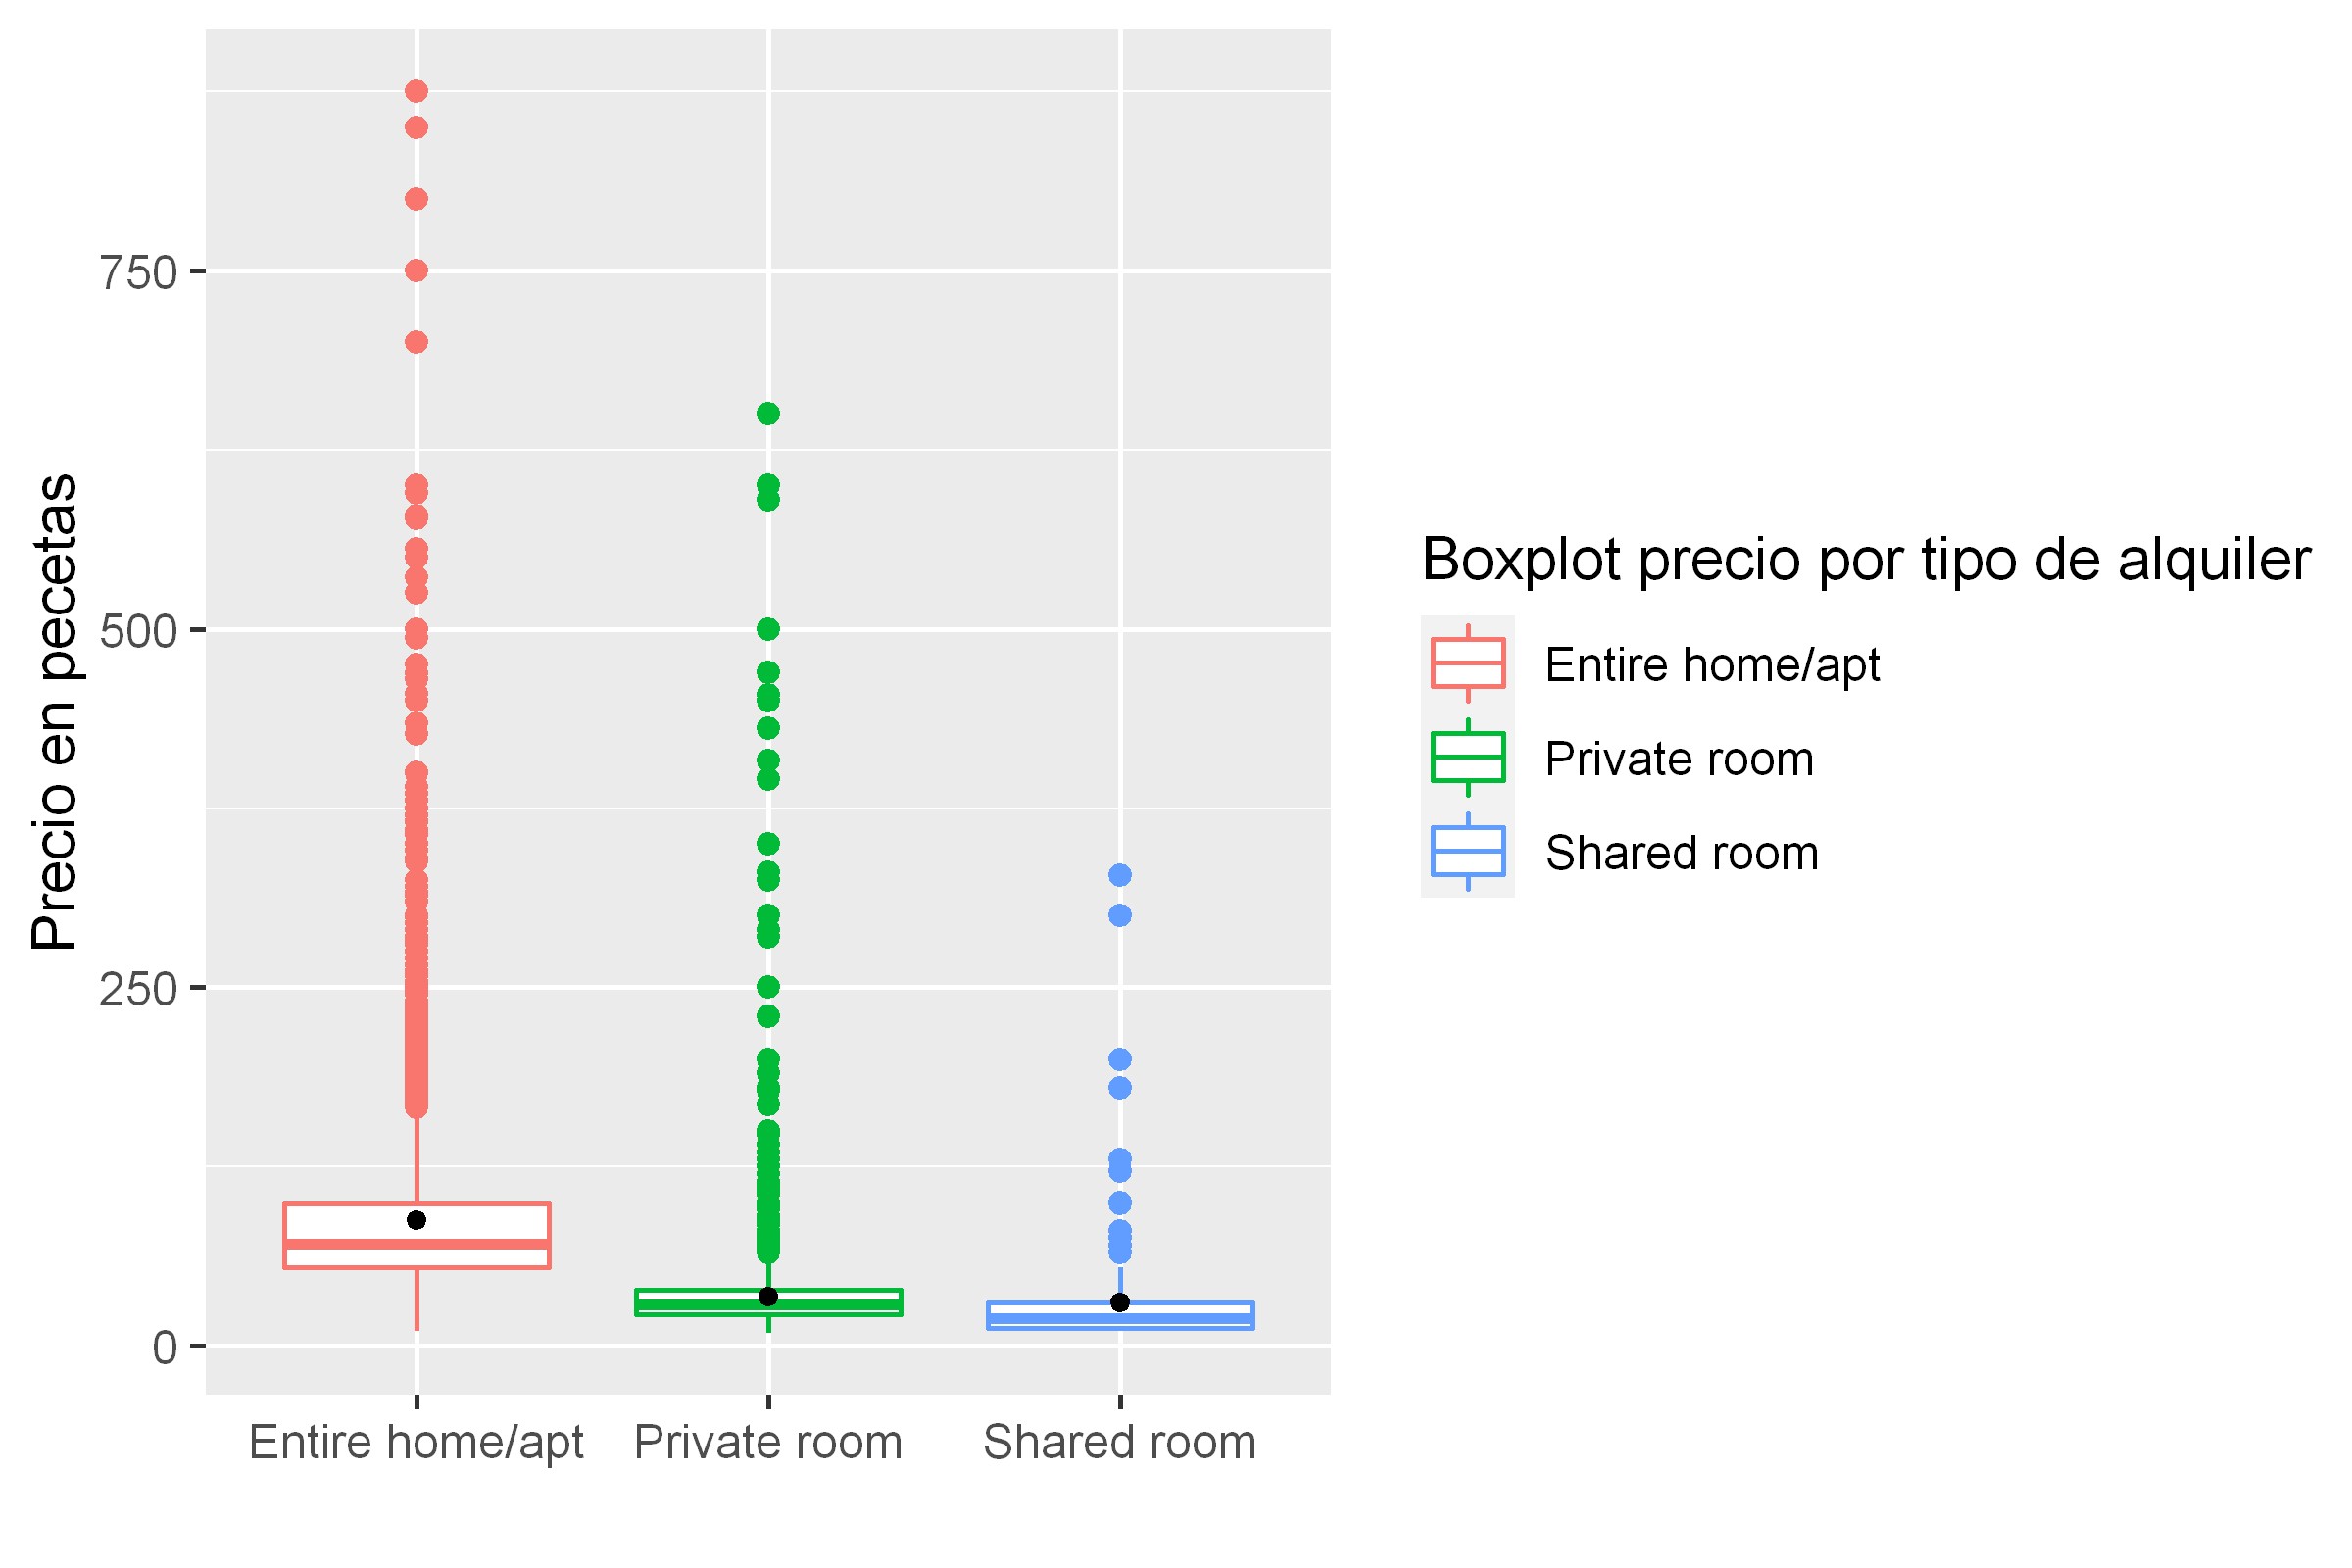

In [61]:
ggplot(data=airbnbModificado,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+
geom_boxplot()+ 
stat_summary(fun=mean, geom="point", shape=20, size=2, color="black") +
scale_color_discrete(name="Boxplot precio por tipo de alquiler")+ylab('Precio en pecetas')+
xlab('')


Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [62]:
paste("El precio medio de una casa/apartamento entero es: ",mean(airbnb[airbnb$TipoAlquiler=="Entire home/apt", "Precio"], na.rm = TRUE))
paste("El precio medio de una habitación privada es: ",mean(airbnb[airbnb$TipoAlquiler=="Private room", "Precio"], na.rm = TRUE))
paste("El precio medio de una habitación compartida es: ",mean(airbnb[airbnb$TipoAlquiler=="Shared room", "Precio"], na.rm = TRUE))

[1] "El precio medio de una casa/apartamento entero es:  87.2966058763931"

[1] "El precio medio de una habitación privada es:  34.255135981217"

[1] "El precio medio de una habitación compartida es:  29.8534031413613"

Warning message:
"Removed 9 rows containing non-finite values (stat_density)."

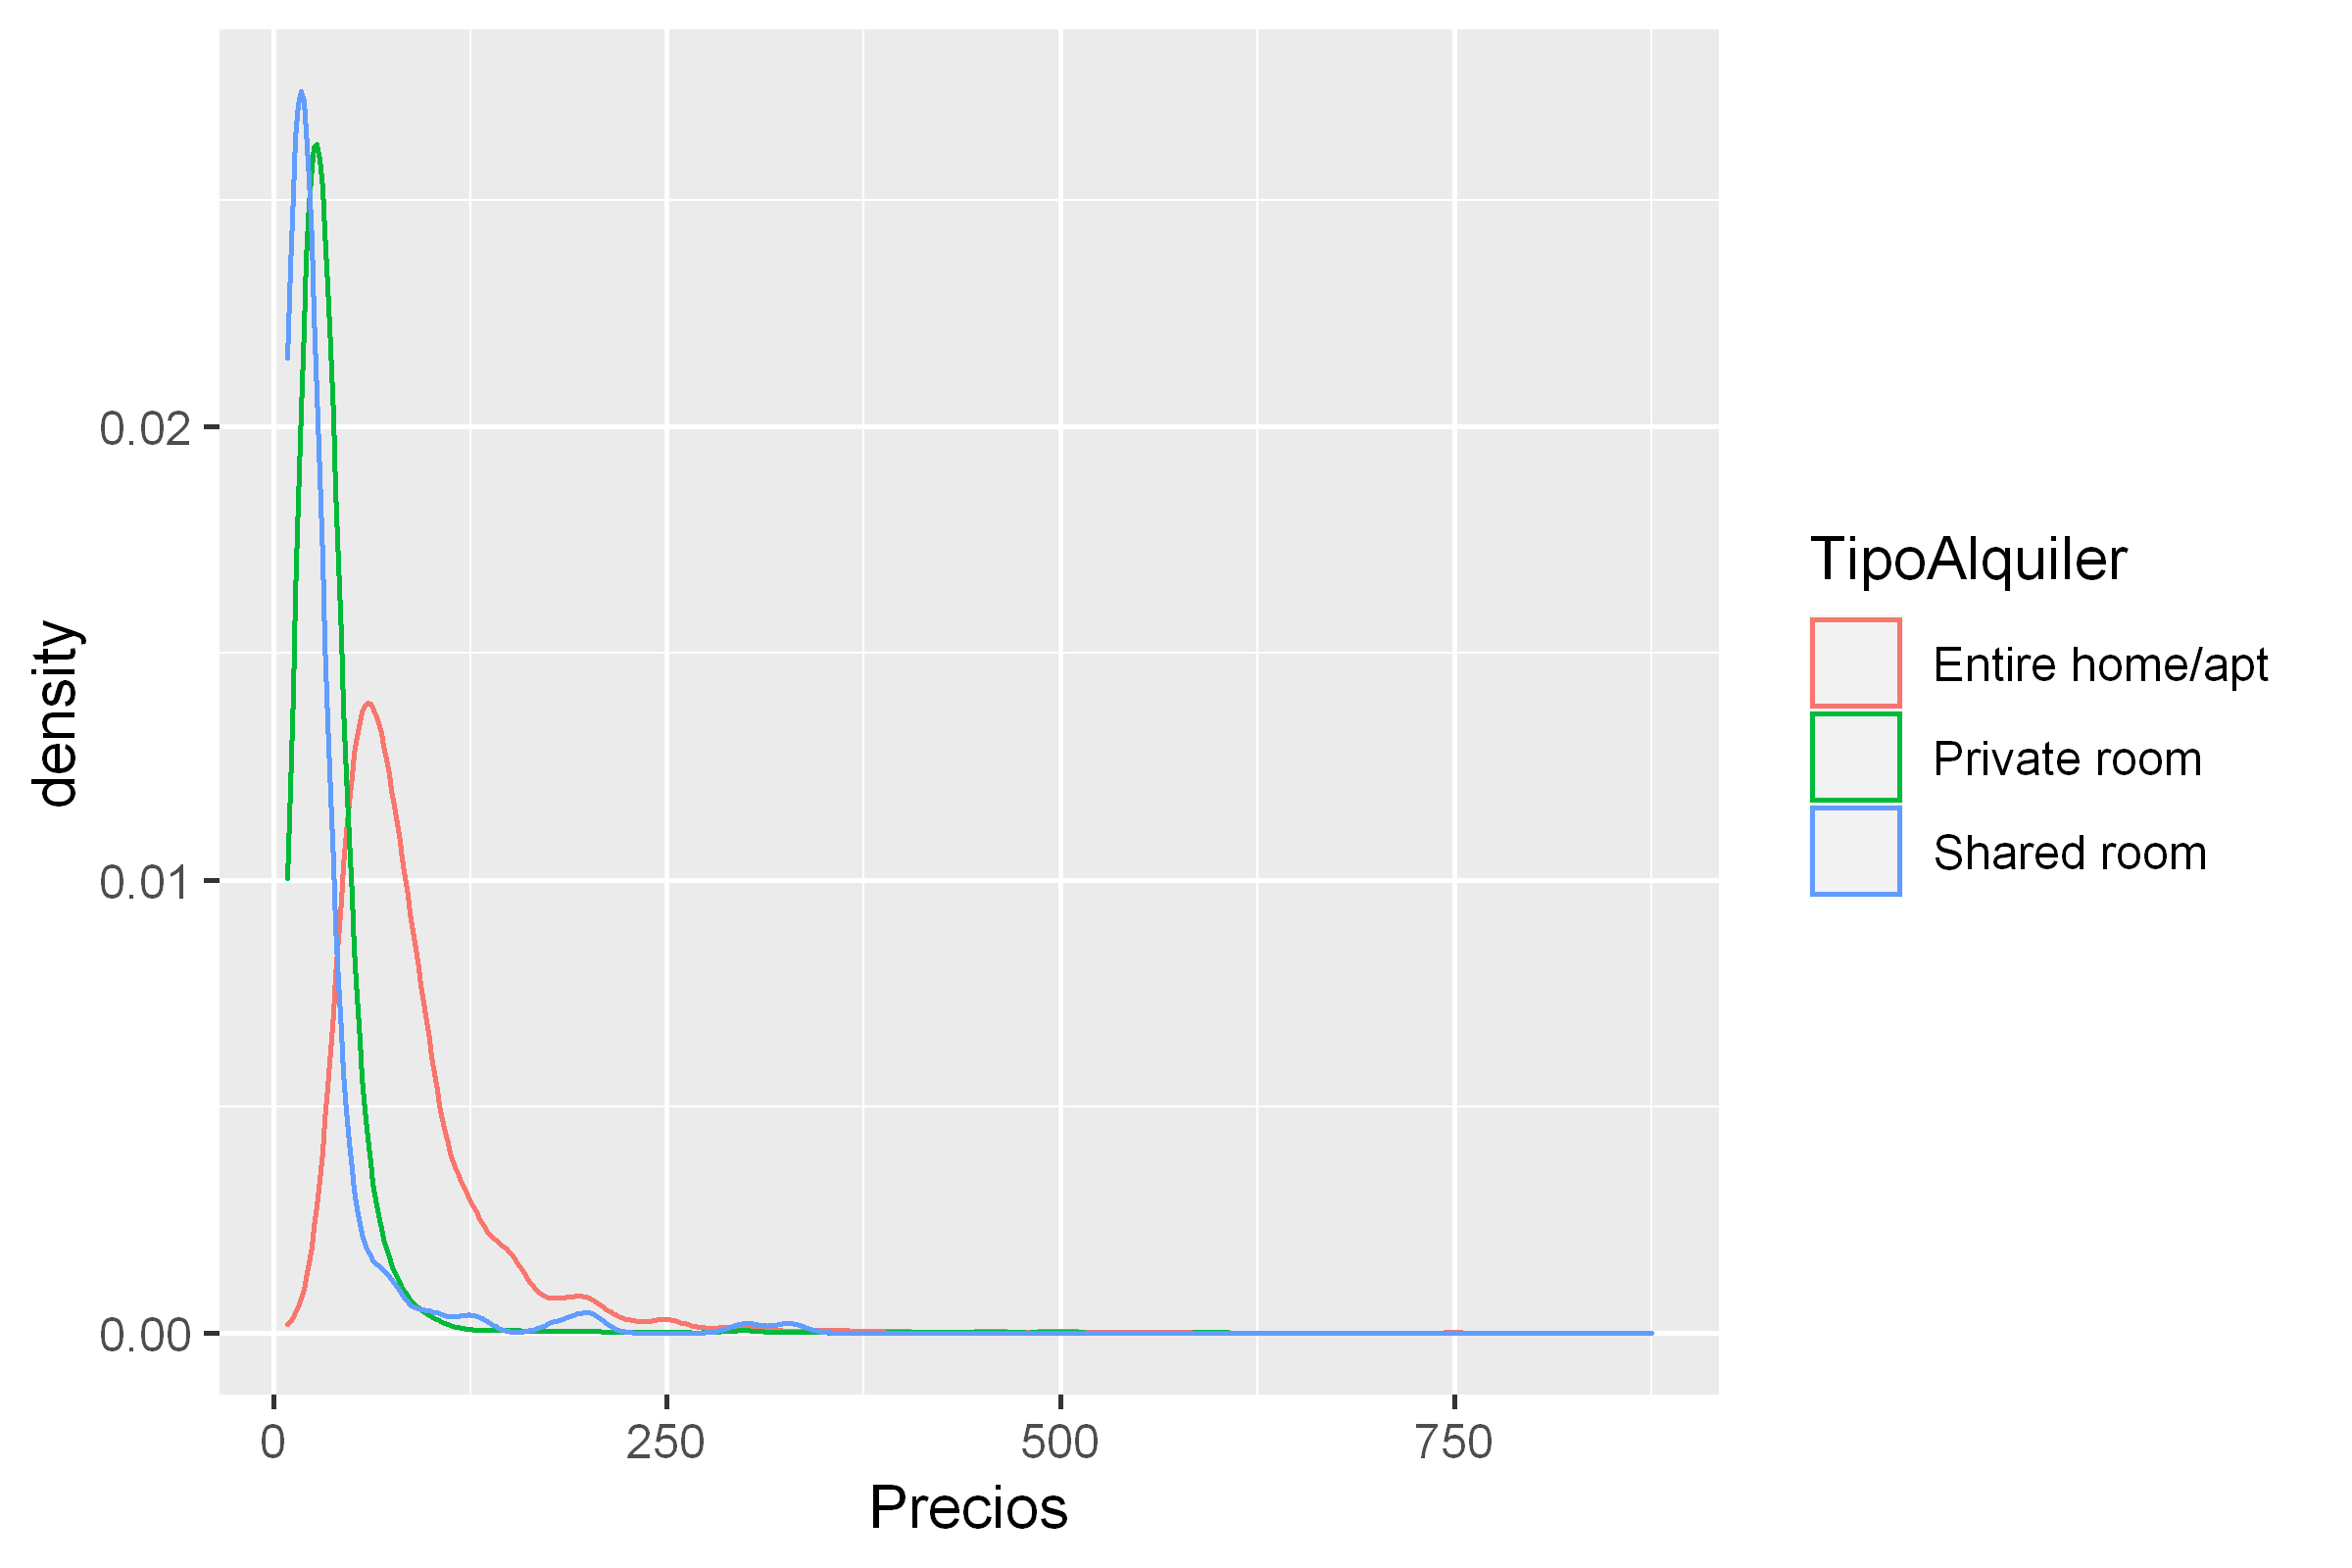

In [63]:
ggplot(data=airbnbModificado, aes(x=Precio, color=TipoAlquiler))+geom_density(bw=10)+
 xlab('Precios')


**------------------ Vemos que no son distribuciones gaussianas, pero por las dudas hacemos el test de SHAKIRA**


In [64]:
EntireHome=airbnb[airbnb$TipoAlquiler=="Entire home/apt", "Precio"]
PrivateRoom=airbnb[airbnb$TipoAlquiler=="Private room", "Precio"]
SharedRoom=airbnb[airbnb$TipoAlquiler=="Shared room", "Precio"]
#Sino no sé cómo tomar los primeros 5000 valores de cada tipo de alquiler. Si tomamos más, el shapiro.test tira error

In [65]:
shapiro.test(EntireHome[1:5000])
shapiro.test(PrivateRoom[1:5000])
shapiro.test(SharedRoom[1:5000])


	Shapiro-Wilk normality test

data:  EntireHome[1:5000]
W = 0.64959, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  PrivateRoom[1:5000]
W = 0.38267, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  SharedRoom[1:5000]
W = 0.4436, p-value < 2.2e-16


**-------------Todos los valores de p son muy pequeños, por lo que ninguna distribución es normal. Por esto, debemos utilizar el test de Kruskal-Wallis**

In [66]:
kruskal.test( Precio~TipoAlquiler, data=airbnb)


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


**--------------------El p tiende a 0 (es muy bajo). Esto significa que las medias son estadísticamente significativas**

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [67]:
airbnb_entire=airbnb[airbnb$TipoAlquiler=="Entire home/apt",]



¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [68]:
head(sort(table(airbnb_entire$Barrio),decreasing = TRUE))


Embajadores Universidad     Palacio         Sol      Cortes    Justicia 
       1228         984         769         701         574         534 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [69]:
#?order

In [160]:
PrecioBarrioMean=aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)


In [162]:

print("Estos son los 5 barrios con mayor precio medio de alquiler para apartamentos enteros junto con sus precios medios:")
Barrios=head(PrecioBarrioMean[order(PrecioBarrioMean$Precio, decreasing=TRUE),],5)
Barrios


[1] "Estos son los 5 barrios con mayor precio medio de alquiler para apartamentos enteros junto con sus precios medios:"


,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El PlantÃ­o,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [73]:
df=data.frame(table(airbnb_entire$Barrio))
names(df) <- c("Barrio", "Freq")
PrecioBarrioMean <- merge(df, PrecioBarrioMean, by="Barrio") #Si sigo ejecutando esta función me sigue añadiendo columnas de frecuencia
head(PrecioBarrioMean[order(PrecioBarrioMean$Freq, decreasing=TRUE),])

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
45,Embajadores,1228,73.70497
109,Universidad,984,79.39674
76,Palacio,769,93.30599
106,Sol,701,100.75036
39,Cortes,574,94.39373
59,Justicia,534,98.25468


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [76]:
#head(PrecioBarrioMean[order(PrecioBarrioMean$Precio, decreasing=TRUE),])
#Primero filtro los barrios por frecuencia mayor a 100, y de ahí ordeno y saco los 5 mayores
df2=PrecioBarrioMean %>% group_by(Barrio) %>% filter(Freq > 100)
df3=head(df2[order(df2$Precio, decreasing=TRUE),],5)
df3

Barrio,Freq,Precio
<fct>,<int>,<dbl>
Recoletos,135,161.92537
Goya,142,111.33803
Sol,701,100.75036
Trafalgar,223,98.57848
Justicia,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

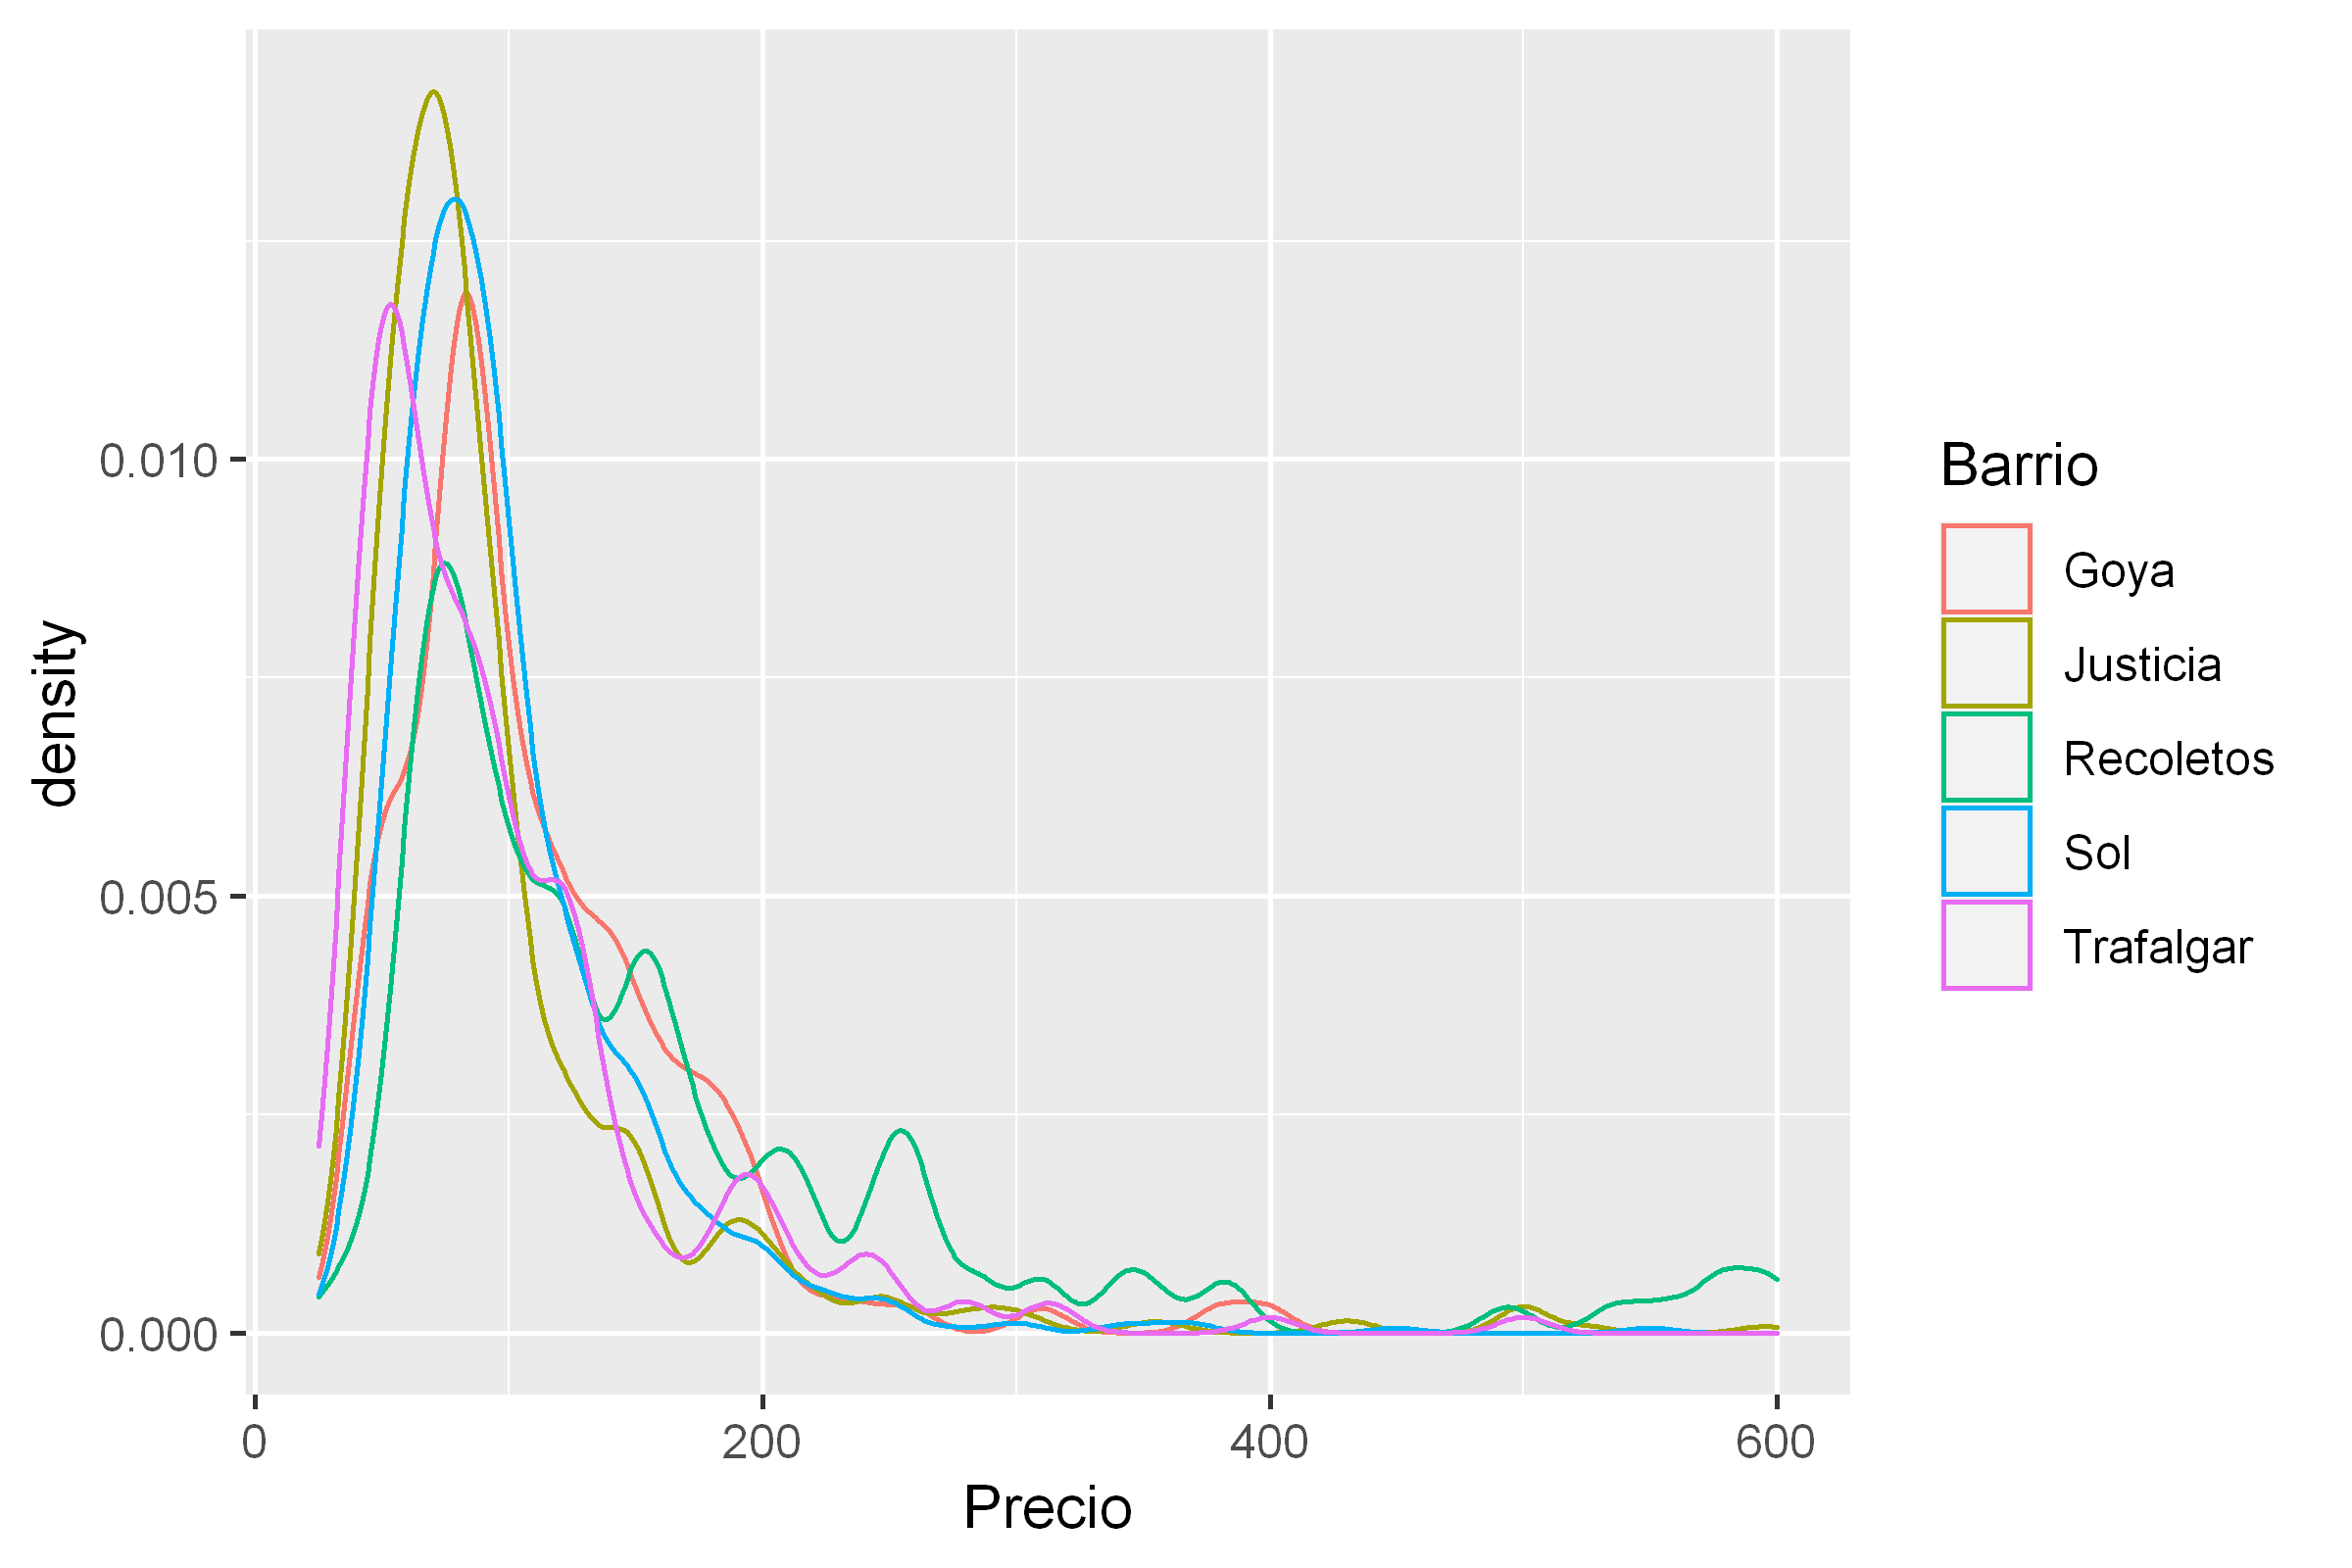

In [85]:
topPrecio_barrios<-df3$Barrio
top_barrios<-subset(airbnb_entire,Barrio %in% topPrecio_barrios)
ggplot(top_barrios,aes(x=Precio,color=Barrio))+geom_density(bw=10)


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [124]:
# top_barrios
paste("El promedio de metros cuadrados de Recoletos es:",mean(top_barrios[top_barrios$Barrio=="Recoletos","MetrosCuadrados"],na.rm=TRUE))
paste("El promedio de metros cuadrados de Goya es:", mean(top_barrios[top_barrios$Barrio=="Goya","MetrosCuadrados"],na.rm=TRUE))
paste("El promedio de metros cuadrados de Justicia es:", mean(top_barrios[top_barrios$Barrio=="Justicia","MetrosCuadrados"],na.rm=TRUE))
paste("El promedio de metros cuadrados de Sol es:", mean(top_barrios[top_barrios$Barrio=="Sol","MetrosCuadrados"],na.rm=TRUE))
paste("El promedio de metros cuadrados de Trafalgar es:", mean(top_barrios[top_barrios$Barrio=="Trafalgar","MetrosCuadrados"],na.rm=TRUE))

TamanioBarrioMean=aggregate(MetrosCuadrados~Barrio,top_barrios,mean,na.rm=TRUE)
df=data.frame(table(airbnb_entire$Barrio))
names(df) <- c("Barrio", "Freq")
TamanioBarrioMean <- merge(df, TamanioBarrioMean, by="Barrio") 
TamanioBarrioMean <- merge(df3, TamanioBarrioMean, by="Barrio") 
head(TamanioBarrioMean)

[1] "El promedio de metros cuadrados de Recoletos es: 26.663161"

[1] "El promedio de metros cuadrados de Goya es: 51.6850356666667"

[1] "El promedio de metros cuadrados de Justicia es: 28.5266858823529"

[1] "El promedio de metros cuadrados de Sol es: 45.6169213833333"

[1] "El promedio de metros cuadrados de Trafalgar es: 29.3042605714286"

,Barrio,Freq.x,Precio,Freq.y,MetrosCuadrados
,<fct>,<int>,<dbl>,<int>,<dbl>
1,Goya,142,111.33803,142,51.68504
2,Justicia,534,98.25468,534,28.52669
3,Recoletos,135,161.92537,135,26.66316
4,Sol,701,100.75036,701,45.61692
5,Trafalgar,223,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 1645 rows containing non-finite values (stat_density)."

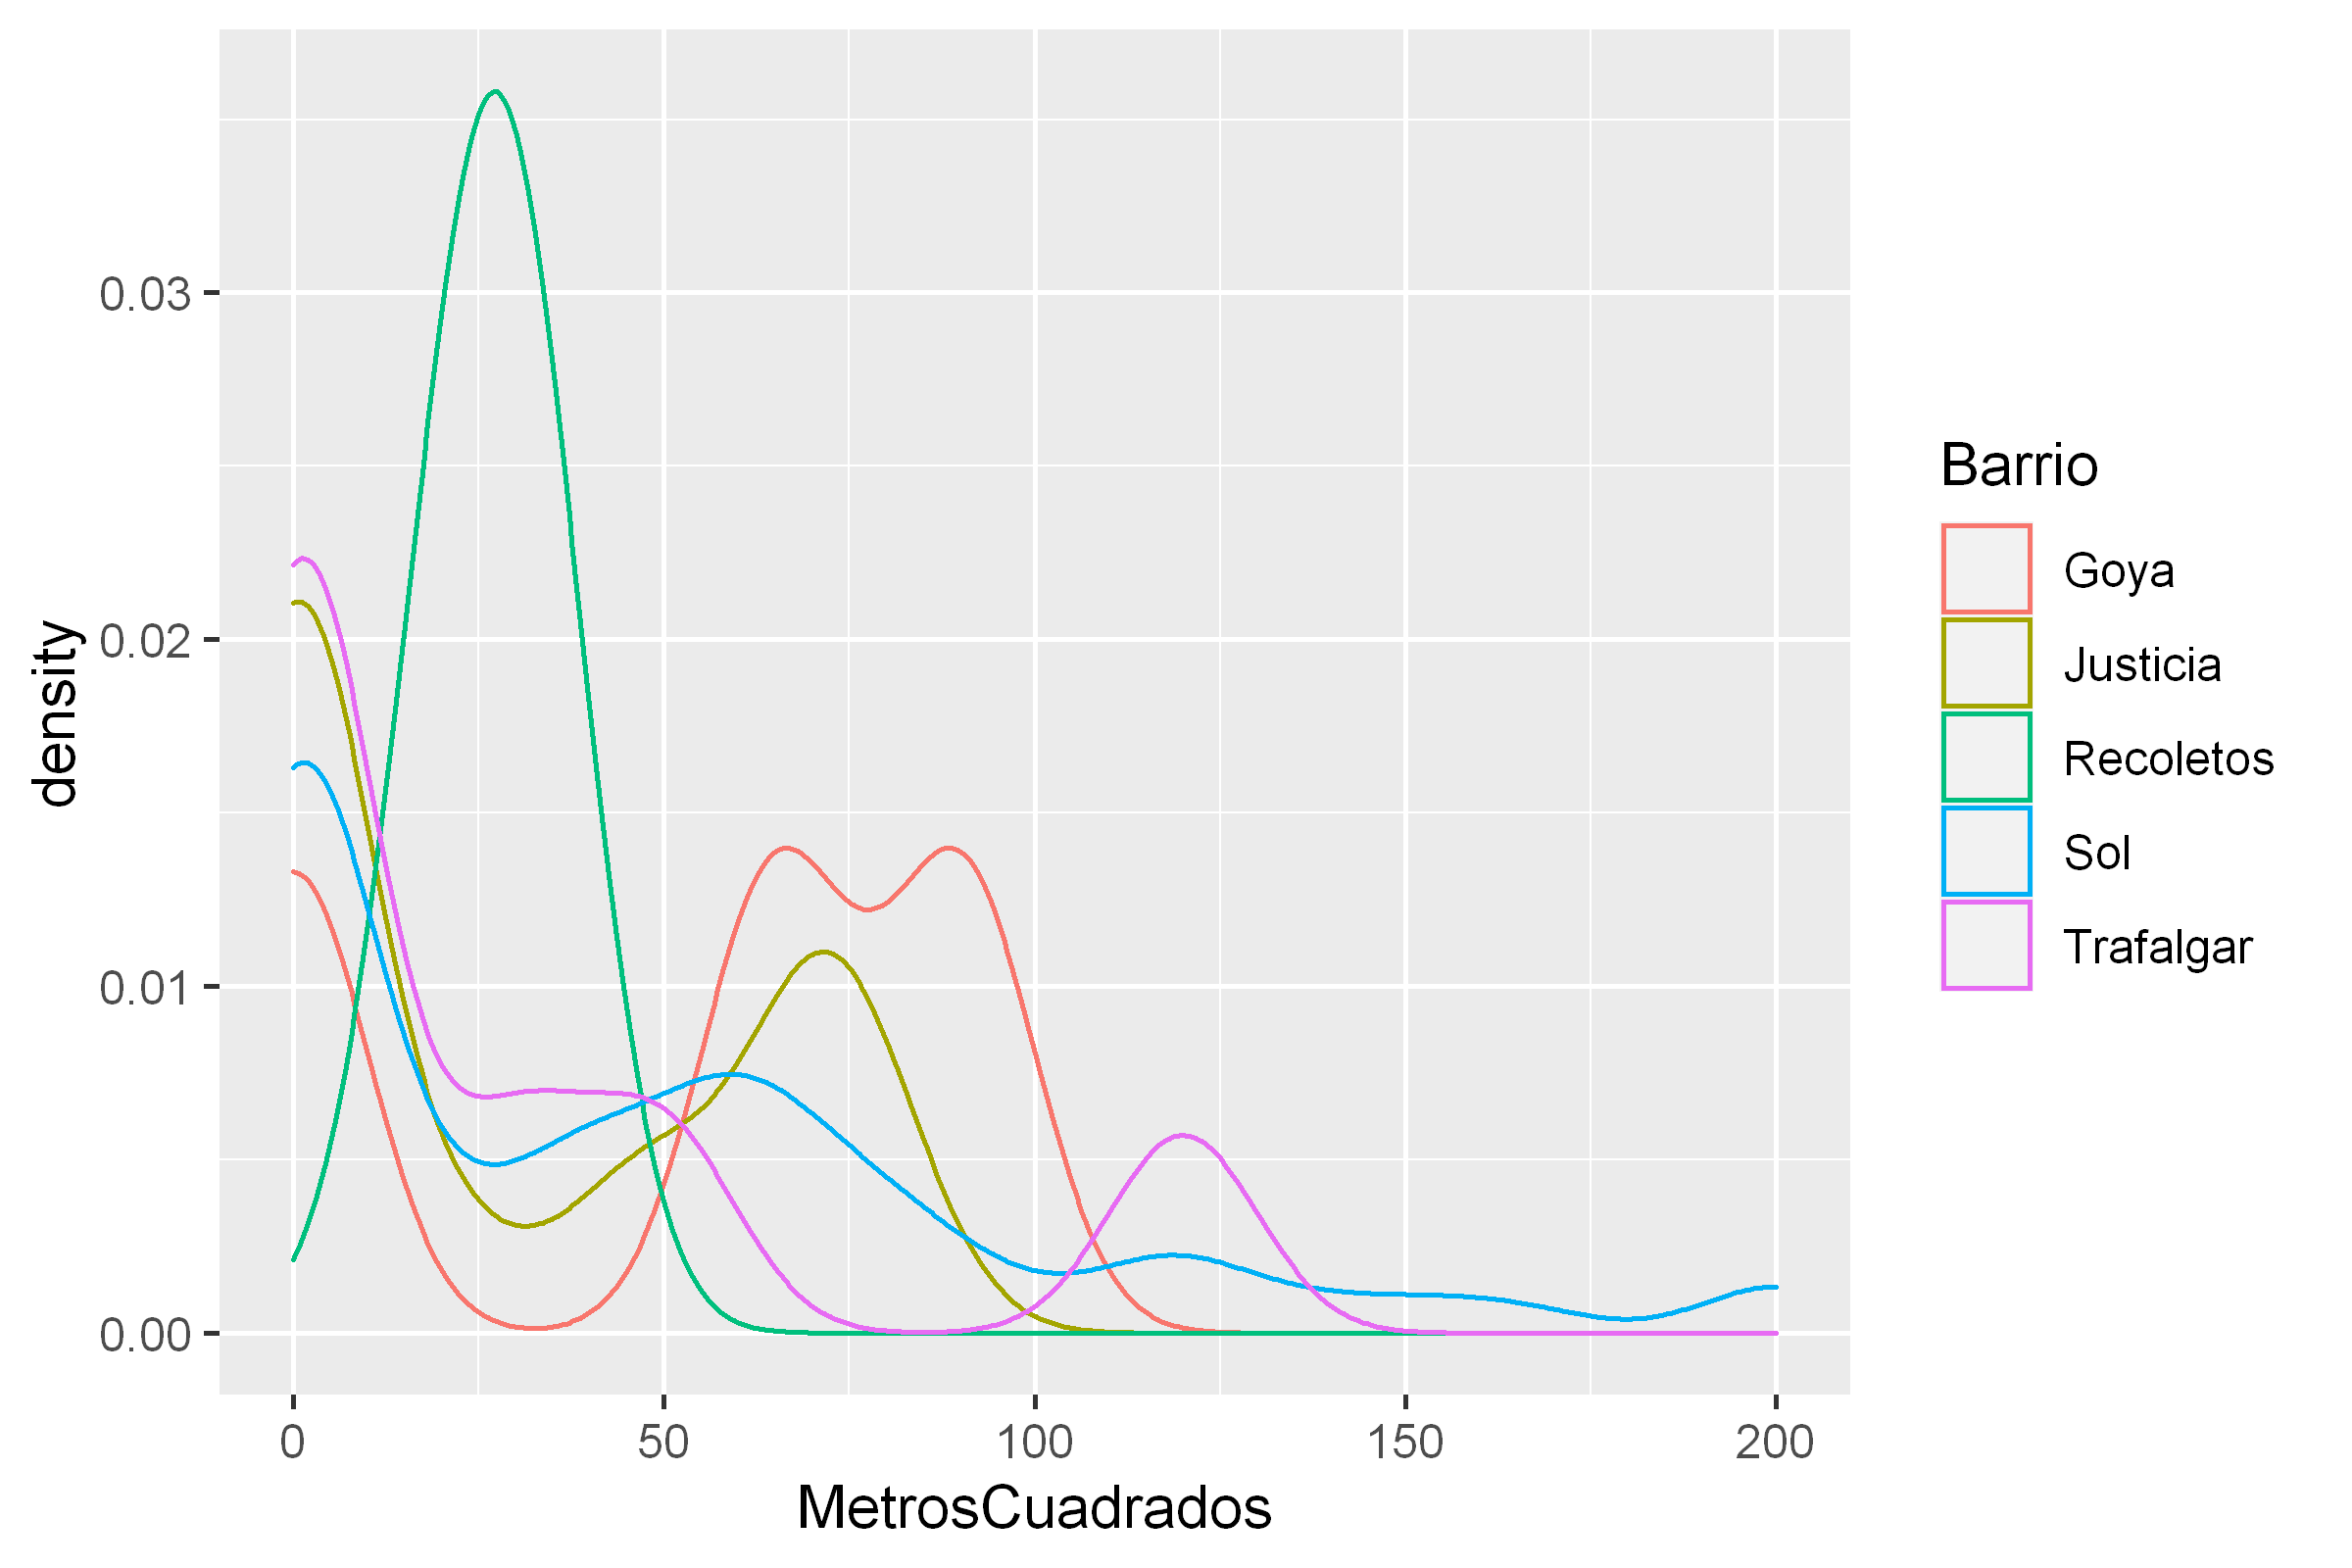

In [125]:
ggplot(top_barrios,aes(x=MetrosCuadrados,color=Barrio))+geom_density(bw=10)


Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [126]:
Goya=airbnb_entire[airbnb_entire$Barrio=="Goya", "MetrosCuadrados"]
Justicia=airbnb_entire[airbnb_entire$Barrio=="Justicia", "MetrosCuadrados"]
Sol=airbnb_entire[airbnb_entire$Barrio=="Sol", "MetrosCuadrados"]
Recoletos=airbnb_entire[airbnb_entire$Barrio=="Recoletos", "MetrosCuadrados"]
Trafalgar=airbnb_entire[airbnb_entire$Barrio=="Trafalgar", "MetrosCuadrados"]

In [128]:
shapiro.test(Goya)
shapiro.test(Justicia)
shapiro.test(Sol)
shapiro.test(Recoletos)
shapiro.test(Trafalgar)


	Shapiro-Wilk normality test

data:  Goya
W = 0.93813, p-value = 0.5199



	Shapiro-Wilk normality test

data:  Justicia
W = 0.76212, p-value = 0.0006419



	Shapiro-Wilk normality test

data:  Sol
W = 0.83089, p-value = 8.691e-07



	Shapiro-Wilk normality test

data:  Recoletos
W = 0.75, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Trafalgar
W = 0.75023, p-value = 0.01276


**-------------------- Primero hacemos tests de SHAKIRO para estar seguros de que no podemos suponer que son distribuciones normales (ya por la gráfica vemos que no). Todos los p-value dan muy bajos así que esto confirma la suposición (el único que no es tan bajo es el de Goya, pero tampoco es tan alto como para suponer distribución normal)**

**----------Entonces, el test que debemos usar es el mismo que la vez pasada, el de Kruskal-Wallis**

In [129]:
kruskal.test( MetrosCuadrados~Barrio, data=top_barrios)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


**---------- Con este p-value de 0.75 , puede que no tengamos suficiente evidencia para rechazar la hipótesis nula de que las medias de los metros cuadrados son todas iguales.

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [136]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
# model <- lm(data=barrio_sol, formula= NumBanyos ~ NumDormitorios)
# summary(model)

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [137]:
# model2<-lm(data=barrio_sol, formula = MetrosCuadrados ~ NumBanyos+NumDormitorios+MaxOcupantes)
# summary(model2)

In [ ]:
library(GGally)


Warning message:
"Removed 641 rows containing non-finite values (stat_density)."Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 641 rows containing missing values"Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 641 rows containing missing values"Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 641 rows containing missing values"Warning message:
"Removed 641 rows containing missing values (geom_point)."Warning message:
"Removed 641 rows containing missing values (geom_point)."Warning message:
"Removed 641 rows containing missing values (geom_point)."

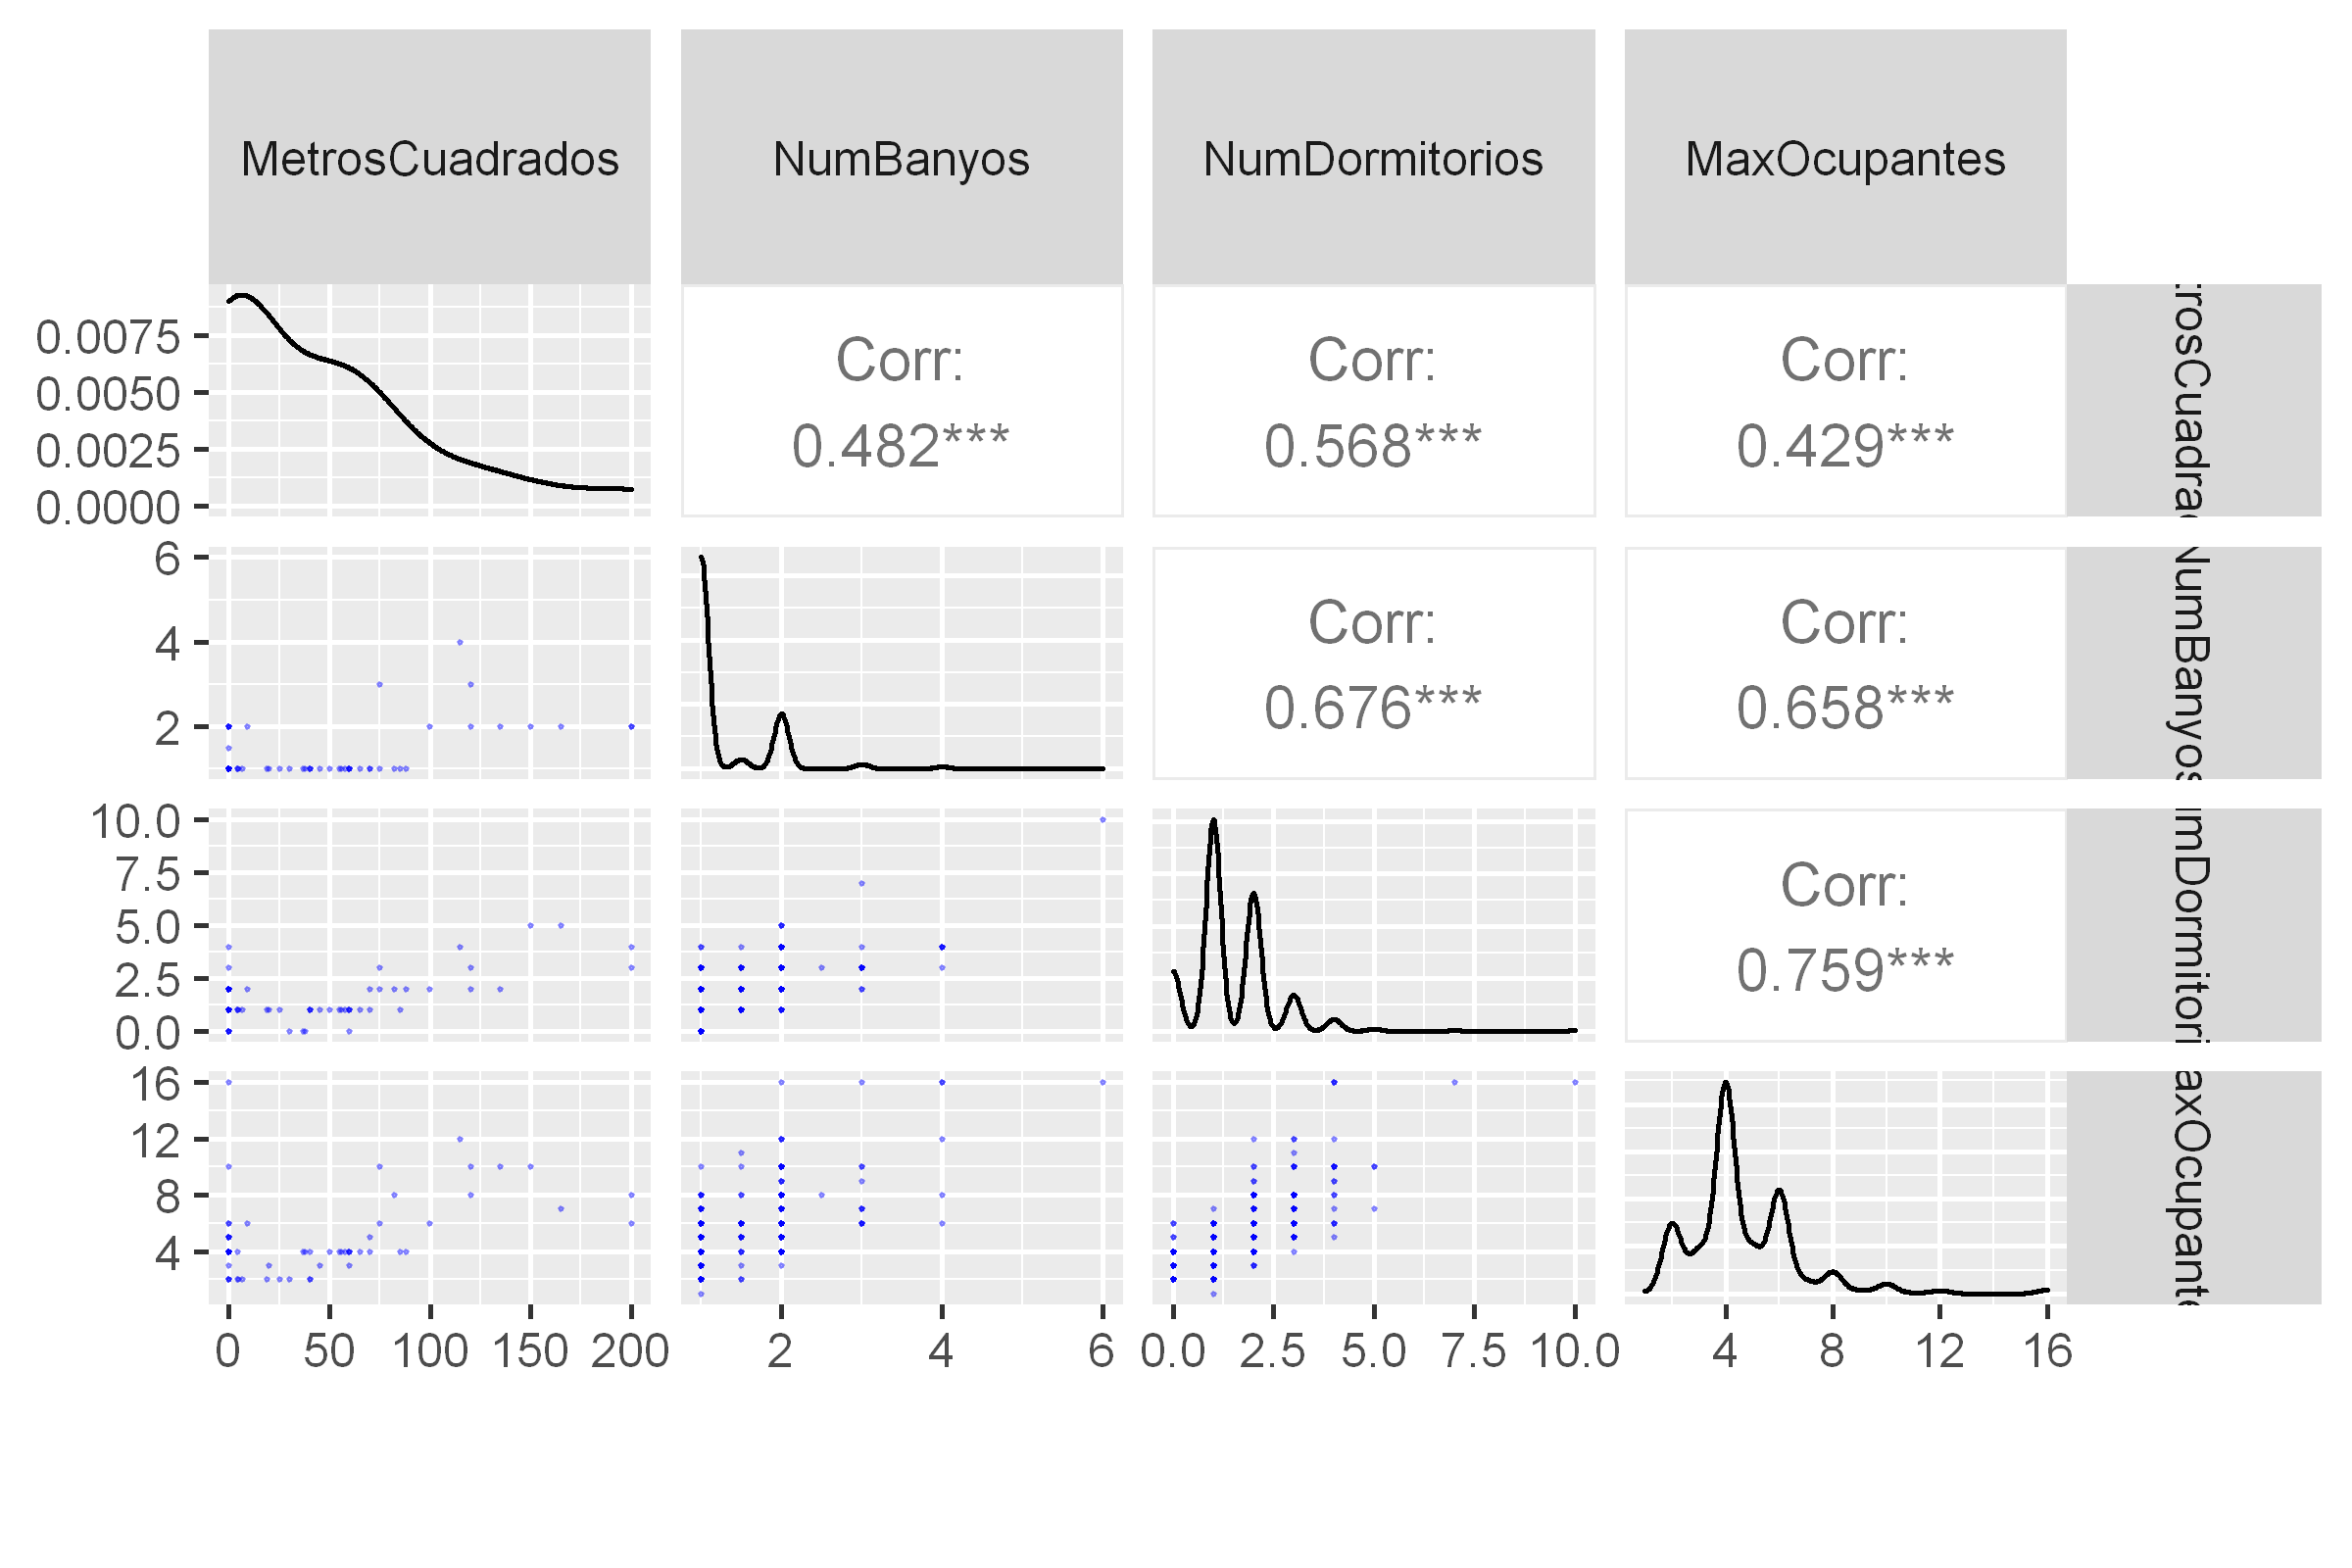

In [135]:

ggpairs(barrio_sol[,c("MetrosCuadrados","NumBanyos","NumDormitorios","MaxOcupantes")],
#        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
      lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
"Removed 641 rows containing non-finite values (stat_bin)."

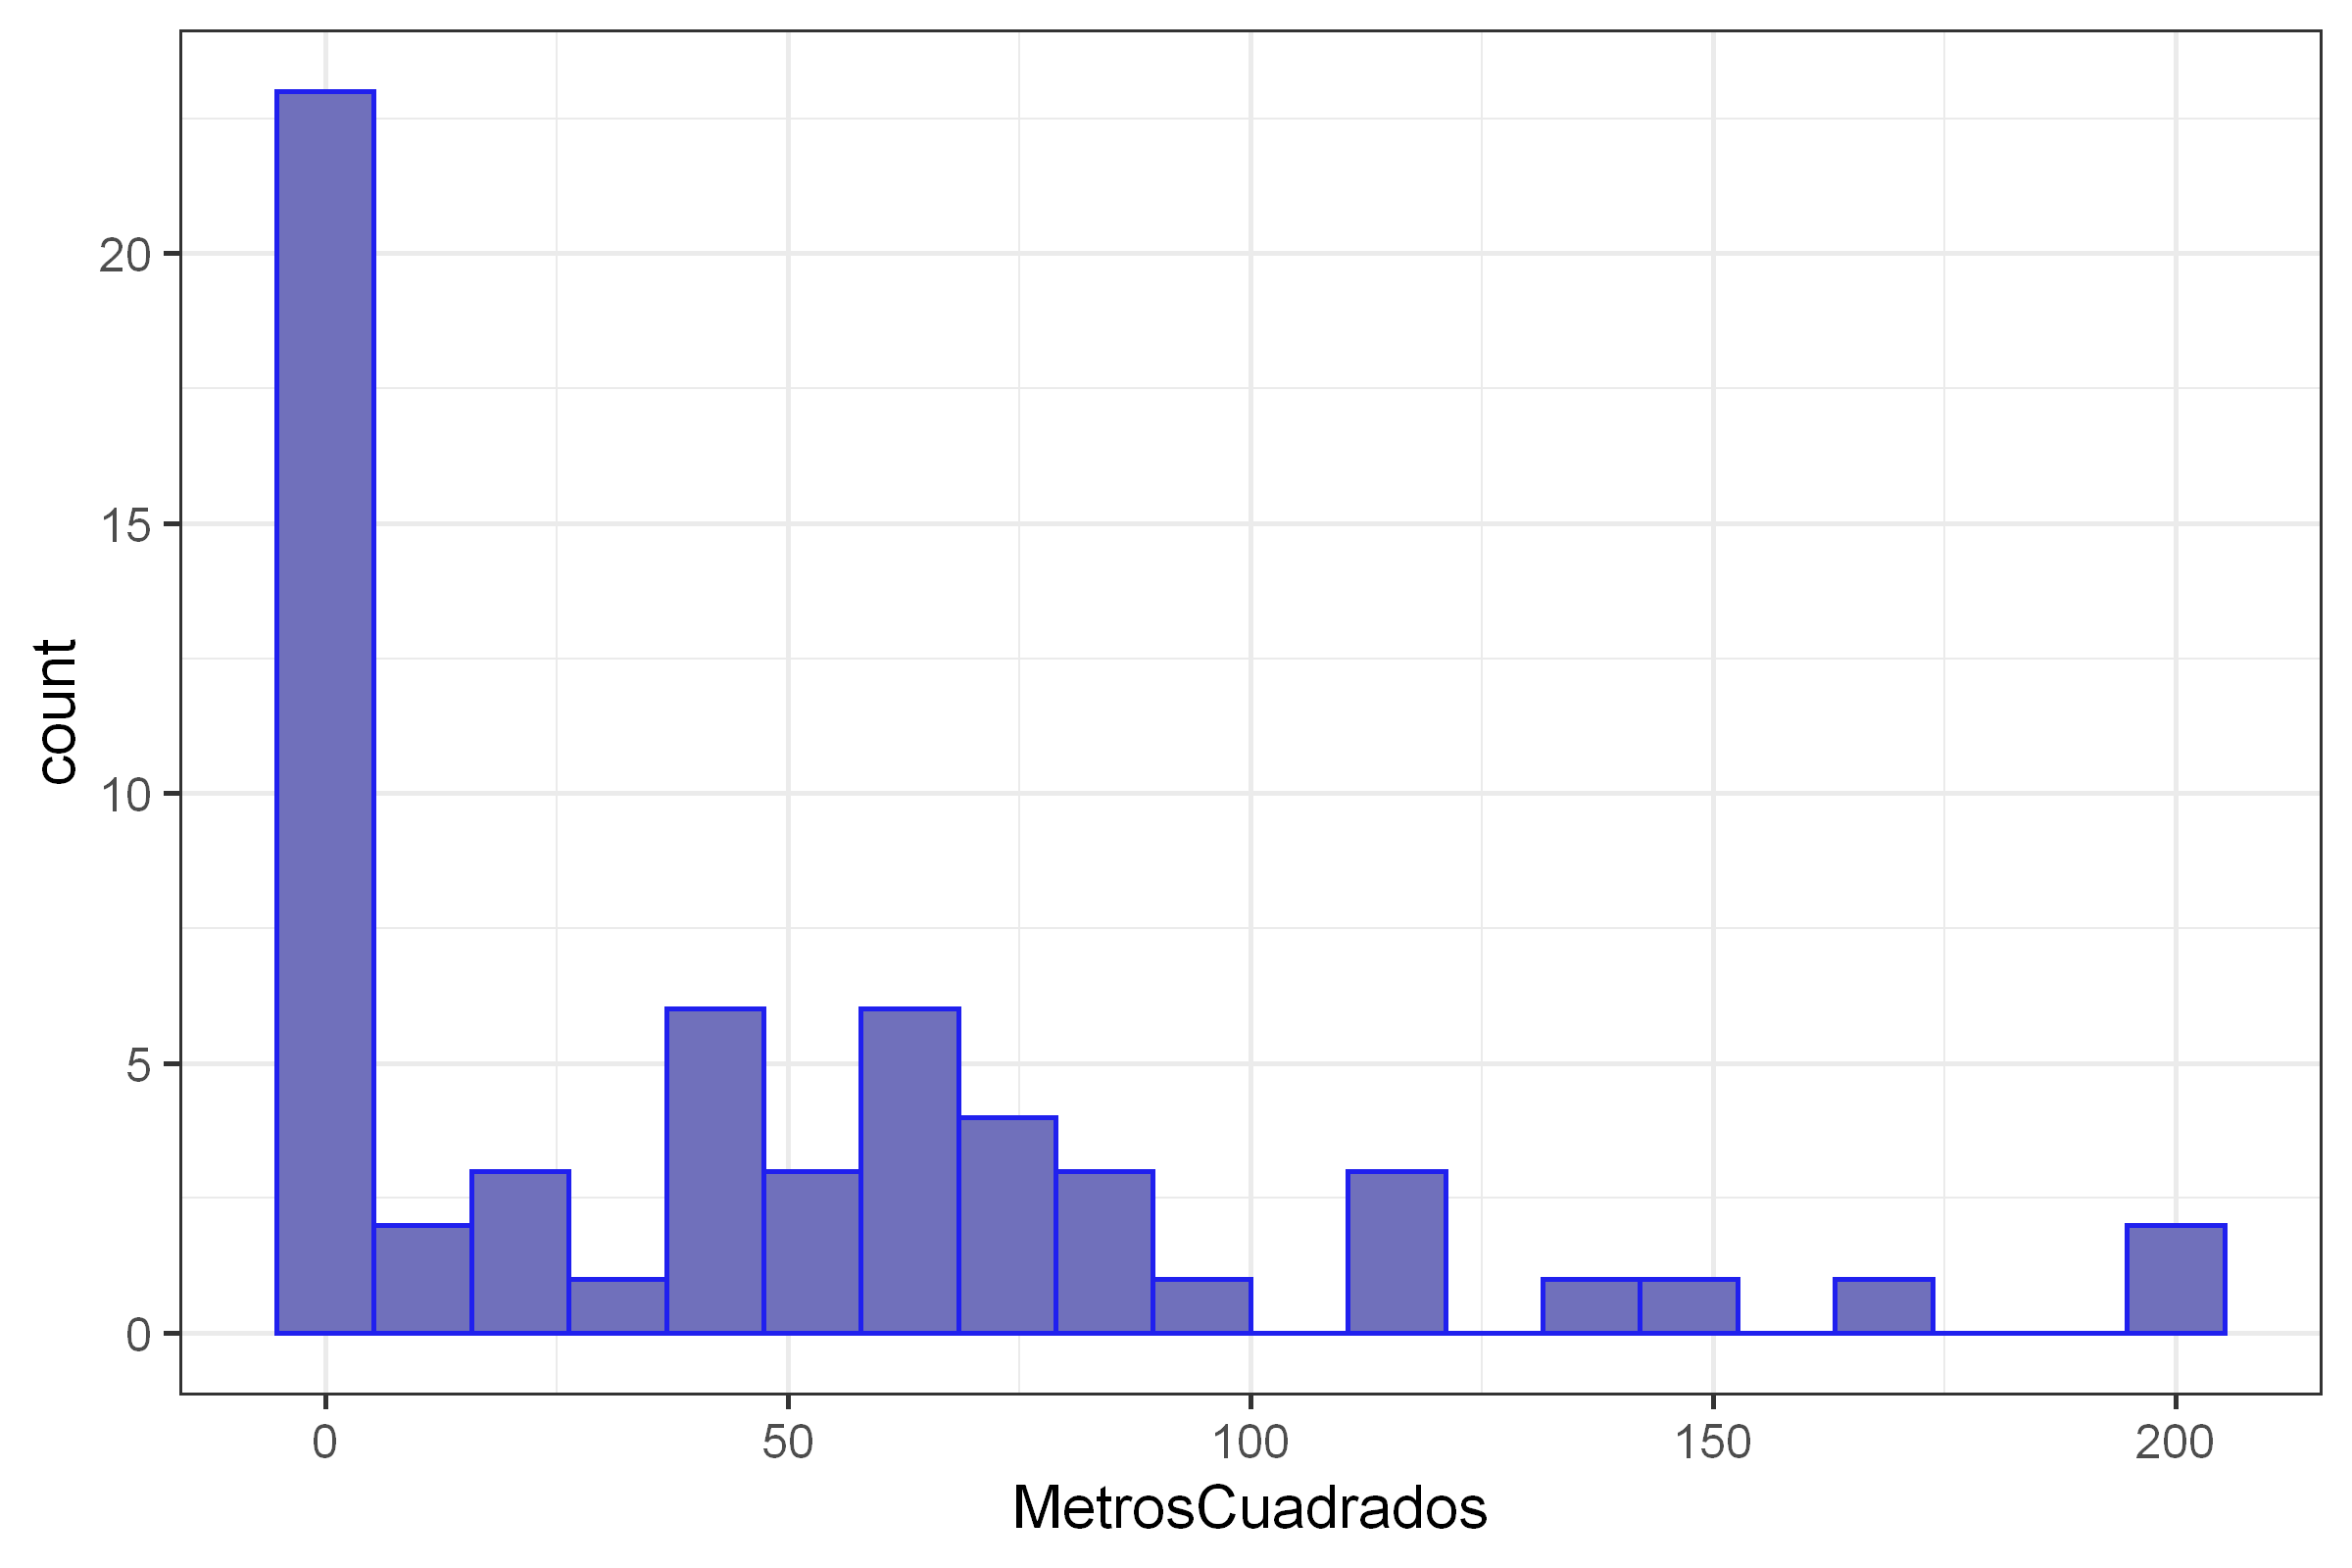

In [140]:
ggplot(data=barrio_sol, aes(x=MetrosCuadrados))+
geom_histogram(bins=20, fill='#7070BB', color='#2020EE')+
theme_bw()

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

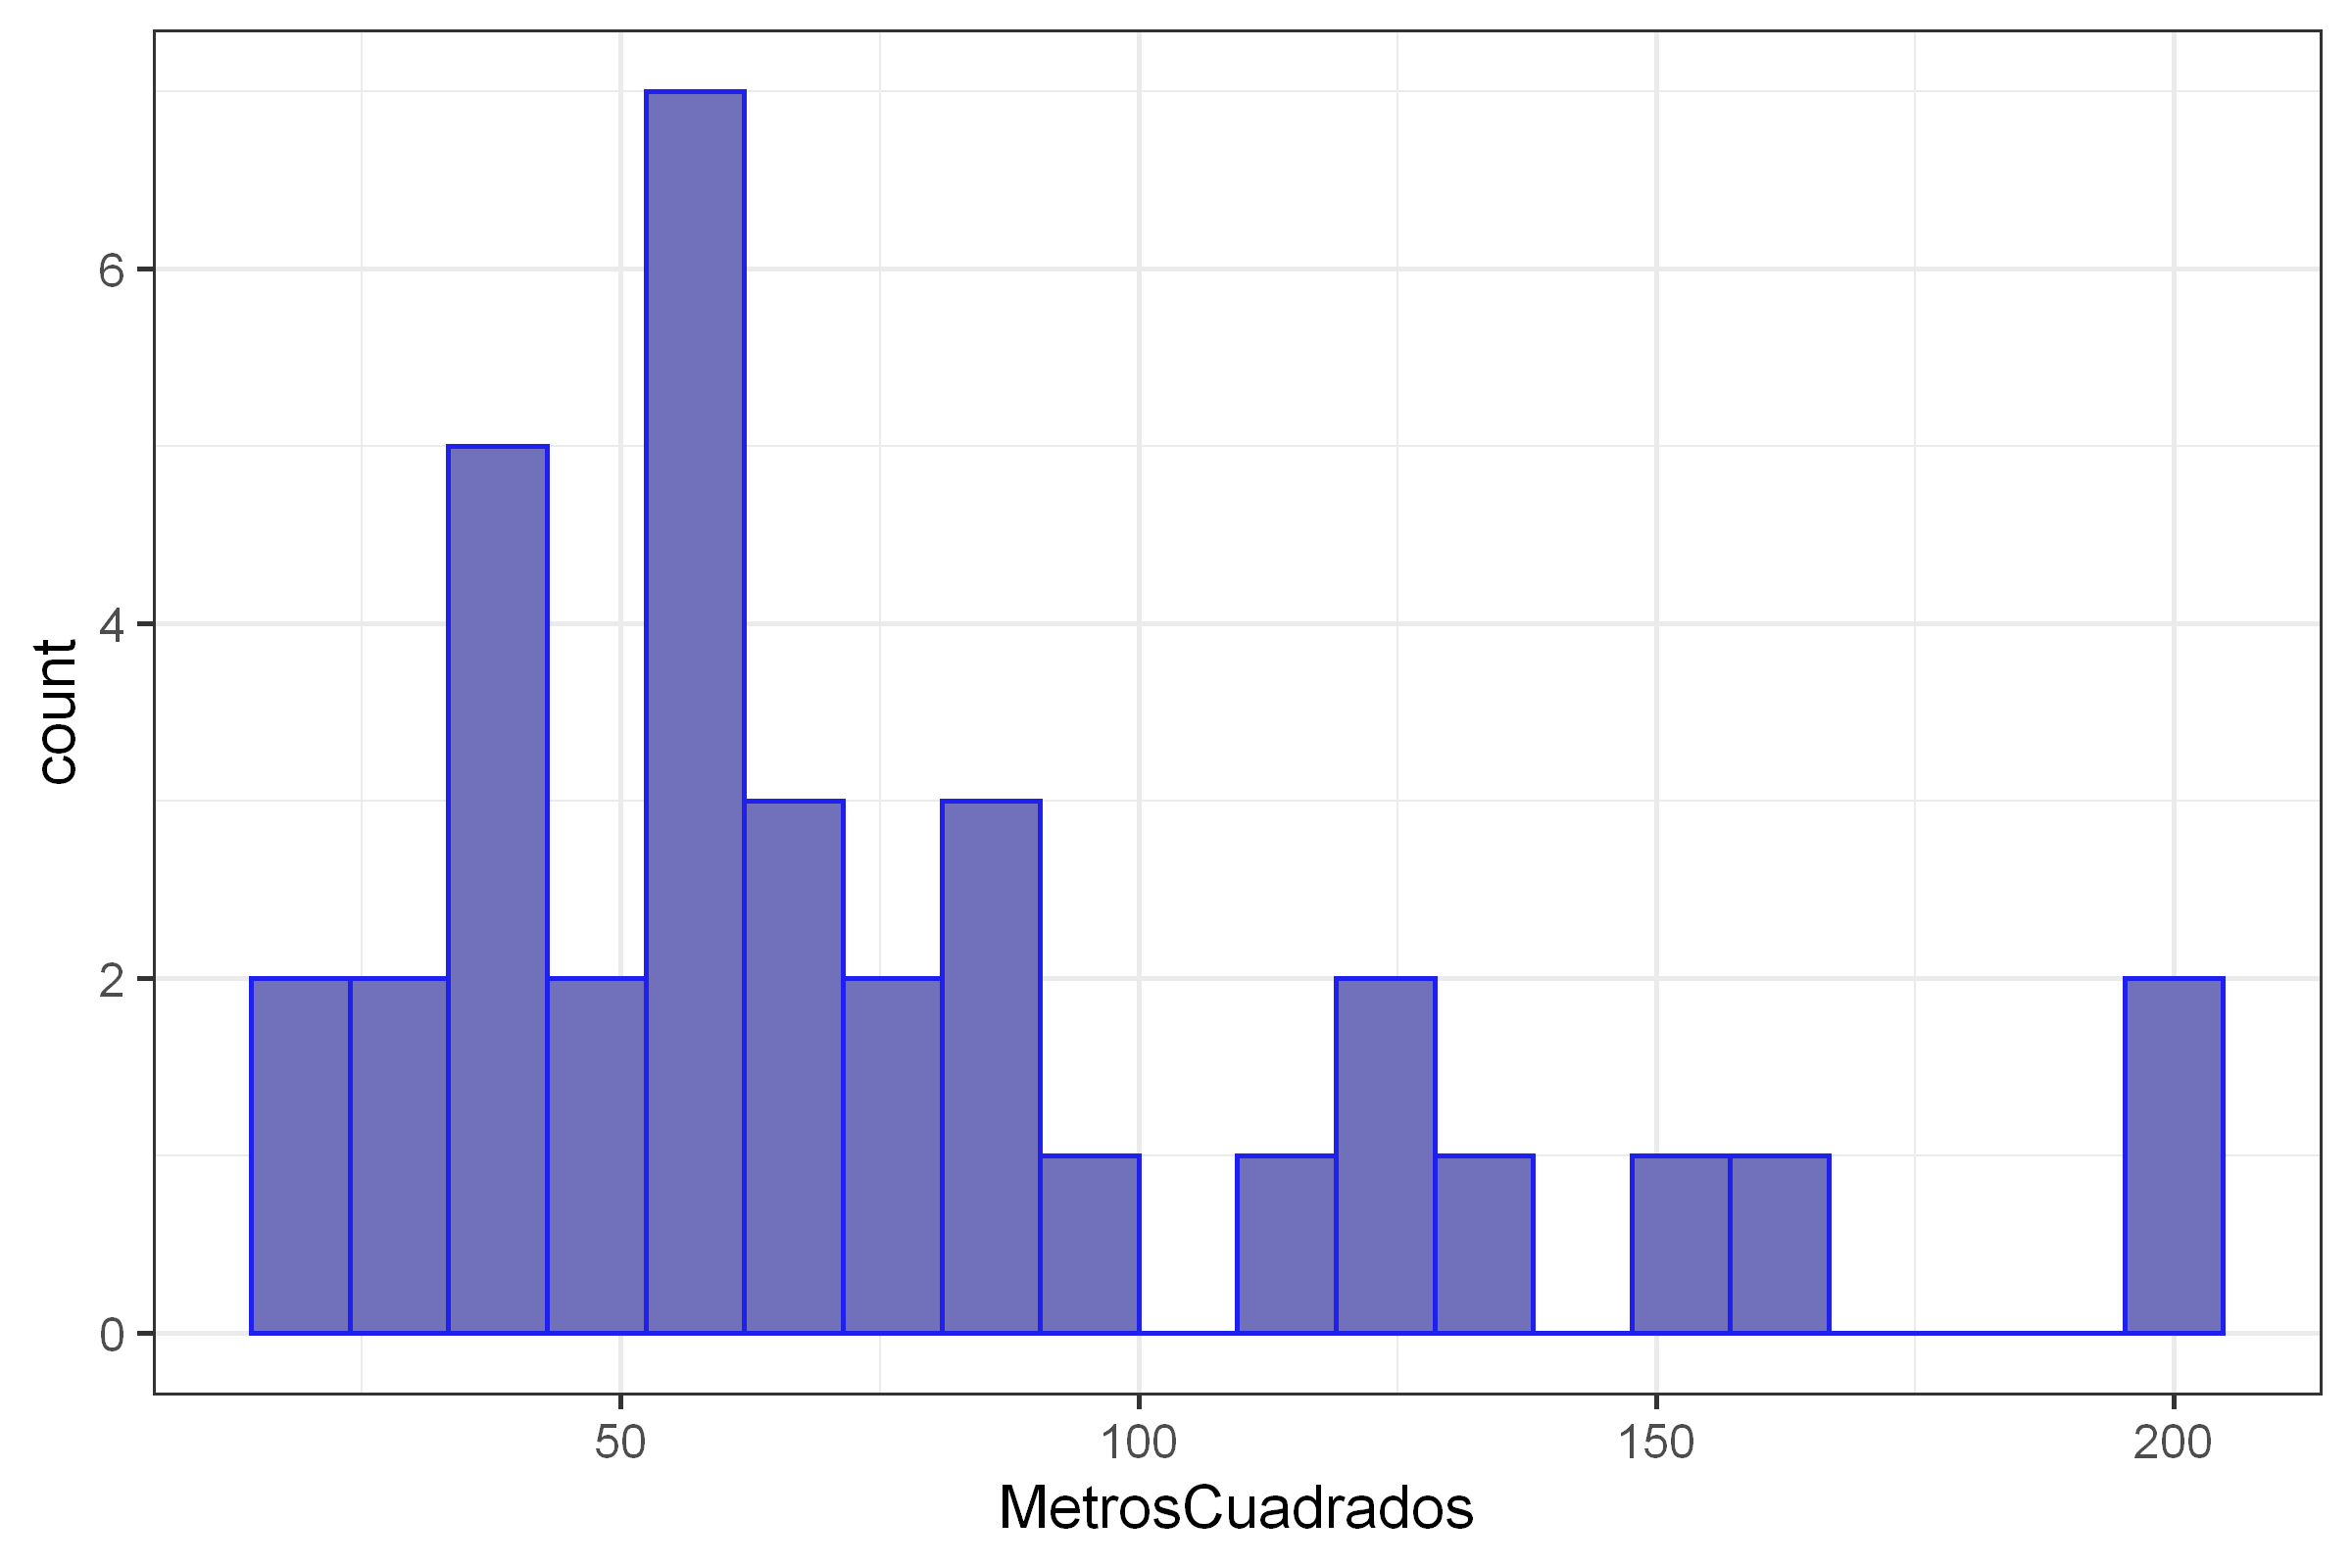

In [142]:
barrio_sol_filtrado=barrio_sol %>% filter(MetrosCuadrados > 10)

ggplot(data=barrio_sol_filtrado, aes(x=MetrosCuadrados))+
geom_histogram(bins=20, fill='#7070BB', color='#2020EE')+
theme_bw()

In [144]:
model<-lm(data=barrio_sol_filtrado, formula = Precio ~ MetrosCuadrados+NumBanyos+NumDormitorios+MaxOcupantes)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados + NumBanyos + NumDormitorios + 
    MaxOcupantes, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

**-------------Por el p-value tan bajodel summary anterior, podemos ver que para estimar el precio del inmbueble nos conviene tener en cuenta el número de habitaciones**

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [163]:
model2<-lm(data=barrio_sol_filtrado, formula = Precio ~ MetrosCuadrados)
summary(model2)
confint(model2,level = 0.95)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.154 -18.405  -0.139   9.146 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9151    12.6752   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.5961,	Adjusted R-squared:  0.5838 
F-statistic:  48.7 on 1 and 33 DF,  p-value: 5.596e-08


,2.5 %,97.5 %
(Intercept),5.1272761,56.70291
MetrosCuadrados,0.6940201,1.26525


2.5 %    97.5 % 
0.6940201 1.2652501

**------------Por cada metro cuadrado, el precio aumenta (es probable que aumente) entre 0.69 y 1.26 euros. Digamos 0.9796 euros.** 

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [155]:
model3<-lm(data=barrio_sol_filtrado, formula = Precio ~ NumDormitorios)
summary(model3)
confint(model3,level = 0.95)



Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_filtrado)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


,2.5 %,97.5 %
(Intercept),23.87992,58.68671
NumDormitorios,31.18746,47.78095


**----------------- Igual que en el caso anterior, por cada habitación el precio aumenta 39.48+/-(31.03) euros**

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [166]:
barrio_sol_3= sum(barrio_sol_filtrado$NumDormitorios == 3)
total=nrow(barrio_sol_filtrado)
barrio_sol_3/total

[1] 0.08571429

**----------------- La probabilidad de encontrar un apartamento con 3 dormitorios es de 8.57%**

In [168]:
binom.test(barrio_sol_3, total) 



	Exact binomial test

data:  barrio_sol_3 and total
number of successes = 3, number of trials = 35, p-value = 4.177e-07
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.01803764 0.23057502
sample estimates:
probability of success 
            0.08571429 


**---------- Esta parte del intervalo de confianza no estoy muy seguro de cómo responderla, no sé si el test es este, o por qué  es este**